In [1436]:
#from google.colab import drive
#drive.mount("/content/drive/")

#!ls "/content/drive/My Drive"

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

# Function to transform target values of output layer
def set_target(outputlayer):
    row_maxes = outputlayer.max(axis=1).reshape(-1, 1)
    outputlayer = np.where(outputlayer == row_maxes, .9, .1)
    return outputlayer 

# Function to plot accuracy vs epoch graph

def plot_accgraph(evaluation, n):
    fig = plt.figure(figsize=(8,5))
    plt.subplot(2,1,1)
    plt.plot(evaluation.history['accuracy'])
    plt.plot(evaluation.history['val_accuracy'])
    plt.title('Accuracy vs Epochs with hidden units = ' +str(n) )
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'test'], loc='lower right')

#Print TensorFlow version
print(tf.__version__)

2.0.0


In [1437]:
path = 'data/'
filename = 'semeion.data'
data = pd.read_csv((path+filename), delimiter = r"\s+", header = None)

In [1438]:
data

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [1439]:
# Delineate our image samples (features)
X = data.iloc[:,:-10]
print(X.shape)
X

(1593, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1589,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1590,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1591,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1440]:
# Convert to array 
X = np.asarray(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1441]:
# Delineate labels
y = data.iloc[:,-10:]
print(y.shape)
y

(1593, 10)


,256,257,258,259,260,261,262,263,264,265
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1588,0,0,0,0,0,0,0,0,0,1
1589,0,0,0,0,0,0,0,0,0,1
1590,0,0,0,0,0,0,0,0,0,1
1591,0,0,0,0,0,0,0,0,0,1


In [1442]:
# Convert to array
y = np.asarray(y)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [1443]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [1444]:
# Number of features in our training set, confirmed
X_train.shape[1]

256

<h1> Training with 20 hidden units </h1>

In [1445]:
# Clear previous session
keras.backend.clear_session()

In [1446]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model20 = keras.Sequential([
    keras.layers.Dense(20, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model20.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Output summary
model20.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                5140      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________


In [1447]:
# Train the neural net

evaluation = model20.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 1115 samples, validate on 478 samples
Epoch 1/50
1115/1115 [==============================] - 1s 514us/sample - loss: 2.2773 - accuracy: 0.1139 - val_loss: 2.2213 - val_accuracy: 0.1088
Epoch 2/50
1115/1115 [==============================] - 0s 141us/sample - loss: 2.1763 - accuracy: 0.1964 - val_loss: 2.1327 - val_accuracy: 0.2741
Epoch 3/50
1115/1115 [==============================] - 0s 160us/sample - loss: 2.0861 - accuracy: 0.3444 - val_loss: 2.0499 - val_accuracy: 0.3745
Epoch 4/50
1115/1115 [==============================] - 0s 161us/sample - loss: 1.9972 - accuracy: 0.4538 - val_loss: 1.9630 - val_accuracy: 0.5063
Epoch 5/50
1115/1115 [==============================] - 0s 146us/sample - loss: 1.9060 - accuracy: 0.5758 - val_loss: 1.8797 - val_accuracy: 0.5523
Epoch 6/50
1115/1115 [==============================] - 0s 146us/sample - loss: 1.8142 - accuracy: 0.6170 - val_loss: 1.7919 - val_accuracy: 0.6234
Epoch 7/50
1115/1115 [==============================] - 0s 155us/

In [1448]:
test_loss, test_acc = model20.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 0.9874439

Test accuracy: 0.8953975


In [1449]:
# Store predictions on test set images
predictions = set_target(model20.predict(X_test))

# Verify shape and output of predictions
print(predictions.shape)
predictions

(478, 10)


array([[0.1, 0.9, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.9],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [1450]:
# Convert predictions to actual digit value

predicted = np.argmax(predictions, axis = 1)
print(predicted.shape)
predicted

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 9, 6, 6, 9, 5, 0, 8, 1, 9, 4, 6, 2,
       8, 3, 0, 5, 8, 9, 0, 1, 2, 8, 6, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 3, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 7, 2, 2, 7, 7, 8, 1, 3, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 4, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 4, 3, 9, 0, 6, 2, 7, 4, 4, 0, 2, 1,
       6, 0, 8, 1, 3, 2, 0, 9, 7, 3, 3, 0, 0, 6, 6, 5, 4, 0, 5, 6, 8, 8,
       4, 1, 9, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 4, 6,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 1, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 9, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 1, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 1, 2, 0,
       1, 2, 9, 2, 9, 7, 8, 7, 8, 7, 2, 3, 1, 1, 8, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 9, 5, 3, 9, 3, 5, 4, 1,
       1, 2, 1, 4, 9, 6, 9, 0, 5, 6, 5, 8, 6, 8, 4, 4, 6, 7, 5, 0, 1, 2,
       4, 4, 4, 2, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1451]:
# Convert labels to actual digit value
actual = np.argmax(y_test, axis = 1)
print(actual.shape)
actual

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 5, 4, 6, 2,
       7, 3, 0, 1, 8, 9, 0, 1, 2, 8, 7, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 9, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 1, 2, 2, 7, 7, 8, 1, 9, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 8, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 1, 3, 5, 0, 6, 2, 7, 4, 4, 6, 2, 1,
       6, 9, 8, 1, 3, 2, 0, 9, 7, 3, 3, 0, 0, 6, 6, 3, 4, 0, 5, 6, 8, 8,
       1, 1, 9, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 7, 2,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 4, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 4, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 7, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 8, 2, 9, 7, 8, 7, 7, 7, 2, 3, 1, 1, 9, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 8, 5, 9, 9, 3, 5, 4, 1,
       1, 8, 1, 4, 9, 0, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 6, 7, 5, 0, 3, 2,
       4, 4, 4, 1, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1452]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.8954
Precision:
[0.94       0.87719298 0.89189189 0.88235294 0.84090909 0.95454545
 0.92857143 0.91428571 0.90740741 0.82      ]
Recall:
[0.95918367 0.86206897 0.86842105 0.9        0.925      0.93333333
 0.98113208 0.84210526 0.89090909 0.78846154]


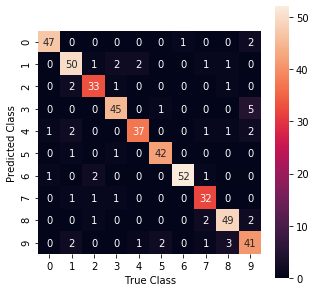

In [1453]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (5,5)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

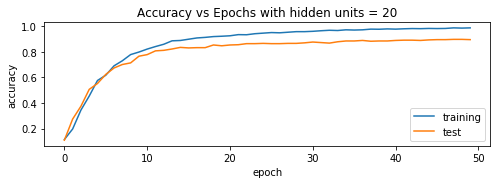

In [1454]:
plot_accgraph(evaluation,20)

<h1> Training with 50 hidden units </h1>

In [1455]:
# Clear previous session
keras.backend.clear_session()

In [1456]:
# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model50 = keras.Sequential([
    keras.layers.Dense(50, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model50.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Output summary
model50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                12850     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 13,360
Trainable params: 13,360
Non-trainable params: 0
_________________________________________________________________


In [1457]:
# Train the neural net

evaluation = model50.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 1115 samples, validate on 478 samples
Epoch 1/50
1115/1115 [==============================] - 1s 508us/sample - loss: 2.2444 - accuracy: 0.1256 - val_loss: 2.1590 - val_accuracy: 0.2531
Epoch 2/50
1115/1115 [==============================] - 0s 147us/sample - loss: 2.0477 - accuracy: 0.4996 - val_loss: 1.9446 - val_accuracy: 0.6841
Epoch 3/50
1115/1115 [==============================] - 0s 159us/sample - loss: 1.8216 - accuracy: 0.7641 - val_loss: 1.7231 - val_accuracy: 0.7678
Epoch 4/50
1115/1115 [==============================] - 0s 155us/sample - loss: 1.5902 - accuracy: 0.8341 - val_loss: 1.5073 - val_accuracy: 0.8243
Epoch 5/50
1115/1115 [==============================] - 0s 155us/sample - loss: 1.3744 - accuracy: 0.8664 - val_loss: 1.3181 - val_accuracy: 0.8347
Epoch 6/50
1115/1115 [==============================] - 0s 156us/sample - loss: 1.1885 - accuracy: 0.8843 - val_loss: 1.1615 - val_accuracy: 0.8347
Epoch 7/50
1115/1115 [==============================] - 0s 154us/

In [1458]:
test_loss, test_acc = model50.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 1.0

Test accuracy: 0.9016736


In [1459]:
# Store predictions on test set images
predictions = set_target(model50.predict(X_test))

# Verify shape and output of predictions
print(predictions.shape)
predictions

(478, 10)


array([[0.1, 0.9, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.9],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [1460]:
# Convert predictions to actual digit value

predicted = np.argmax(predictions, axis = 1)
print(predicted.shape)
predicted

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 5, 4, 6, 2,
       8, 3, 0, 5, 8, 9, 0, 1, 2, 8, 6, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 4, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 7, 2, 2, 7, 7, 8, 1, 3, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 2, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 4, 3, 9, 0, 6, 2, 7, 4, 4, 0, 2, 1,
       6, 4, 8, 1, 3, 2, 0, 9, 7, 3, 3, 0, 0, 6, 6, 5, 4, 0, 5, 4, 8, 8,
       4, 1, 3, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 8, 6,
       8, 3, 0, 4, 2, 1, 8, 1, 4, 8, 2, 1, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 4, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 1, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 9, 2, 9, 7, 8, 7, 8, 7, 2, 3, 1, 1, 8, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 9, 5, 3, 9, 3, 5, 4, 1,
       1, 2, 1, 4, 9, 0, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 6, 7, 5, 0, 1, 2,
       4, 4, 4, 2, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1461]:
# Convert labels to actual digit value
actual = np.argmax(y_test, axis = 1)
print(actual.shape)
actual

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 5, 4, 6, 2,
       7, 3, 0, 1, 8, 9, 0, 1, 2, 8, 7, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 9, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 1, 2, 2, 7, 7, 8, 1, 9, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 8, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 1, 3, 5, 0, 6, 2, 7, 4, 4, 6, 2, 1,
       6, 9, 8, 1, 3, 2, 0, 9, 7, 3, 3, 0, 0, 6, 6, 3, 4, 0, 5, 6, 8, 8,
       1, 1, 9, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 7, 2,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 4, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 4, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 7, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 8, 2, 9, 7, 8, 7, 7, 7, 2, 3, 1, 1, 9, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 8, 5, 9, 9, 3, 5, 4, 1,
       1, 8, 1, 4, 9, 0, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 6, 7, 5, 0, 3, 2,
       4, 4, 4, 1, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1462]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.9017
Precision:
[0.94117647 0.89473684 0.86842105 0.90196078 0.82608696 0.95555556
 0.94444444 0.91176471 0.89285714 0.86956522]
Recall:
[0.97959184 0.87931034 0.86842105 0.92       0.95       0.95555556
 0.96226415 0.81578947 0.90909091 0.76923077]


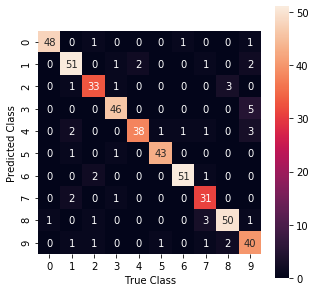

In [1463]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (5,5)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

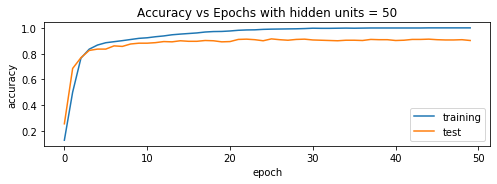

In [1464]:
plot_accgraph(evaluation,50)

<h1> Training with 100 hidden units </h1>

In [1465]:
# Clear previous session
keras.backend.clear_session()

In [1466]:
# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model100 = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model100.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Output summary
model100.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


In [1467]:
# Train the neural net

evaluation = model100.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 1115 samples, validate on 478 samples
Epoch 1/50
1115/1115 [==============================] - 1s 979us/sample - loss: 2.1346 - accuracy: 0.3973 - val_loss: 1.9167 - val_accuracy: 0.6674
Epoch 2/50
1115/1115 [==============================] - 0s 168us/sample - loss: 1.6608 - accuracy: 0.7848 - val_loss: 1.4865 - val_accuracy: 0.7741
Epoch 3/50
1115/1115 [==============================] - 0s 162us/sample - loss: 1.2925 - accuracy: 0.8386 - val_loss: 1.1866 - val_accuracy: 0.8410
Epoch 4/50
1115/1115 [==============================] - 0s 159us/sample - loss: 1.0202 - accuracy: 0.8691 - val_loss: 0.9689 - val_accuracy: 0.8577
Epoch 5/50
1115/1115 [==============================] - 0s 162us/sample - loss: 0.8186 - accuracy: 0.8861 - val_loss: 0.8025 - val_accuracy: 0.8640
Epoch 6/50
1115/1115 [==============================] - 0s 157us/sample - loss: 0.6651 - accuracy: 0.9049 - val_loss: 0.6826 - val_accuracy: 0.8745
Epoch 7/50
1115/1115 [==============================] - 0s 166us/

In [1468]:
test_loss, test_acc = model100.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 1.0

Test accuracy: 0.916318


In [1469]:
# Store predictions on test set images
predictions = set_target(model100.predict(X_test))

# Verify shape and output of predictions
print(predictions.shape)
predictions

(478, 10)


array([[0.1, 0.9, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.9],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [1470]:
# Convert predictions to actual digit value

predicted = np.argmax(predictions, axis = 1)
print(predicted.shape)
predicted

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 5, 4, 6, 2,
       8, 3, 0, 5, 8, 9, 0, 1, 2, 8, 6, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 3, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 7, 2, 2, 7, 7, 8, 1, 3, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 8, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 4, 3, 9, 0, 6, 2, 7, 4, 4, 0, 2, 1,
       6, 9, 8, 1, 3, 2, 0, 9, 7, 7, 3, 0, 0, 6, 6, 5, 4, 0, 5, 4, 8, 8,
       4, 1, 9, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 8, 6,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 1, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 4, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 1, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 9, 2, 9, 7, 8, 7, 9, 7, 2, 3, 1, 1, 8, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 8, 5, 3, 9, 3, 5, 4, 1,
       1, 2, 1, 4, 9, 0, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 5, 7, 5, 0, 1, 2,
       4, 4, 4, 2, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1471]:
# Convert labels to actual digit value
actual = np.argmax(y_test, axis = 1)
print(actual.shape)
actual

(478,)


array([1, 5, 8, 6, 1, 8, 6, 8, 8, 6, 1, 6, 6, 9, 5, 0, 8, 1, 5, 4, 6, 2,
       7, 3, 0, 1, 8, 9, 0, 1, 2, 8, 7, 9, 1, 2, 4, 1, 7, 2, 7, 8, 8, 7,
       6, 0, 6, 1, 0, 3, 9, 8, 4, 4, 1, 0, 1, 9, 0, 6, 4, 0, 9, 5, 7, 0,
       6, 8, 1, 2, 2, 7, 7, 8, 1, 9, 2, 5, 9, 7, 1, 6, 6, 8, 9, 1, 8, 5,
       3, 8, 5, 8, 6, 7, 6, 7, 9, 2, 1, 3, 5, 0, 6, 2, 7, 4, 4, 6, 2, 1,
       6, 9, 8, 1, 3, 2, 0, 9, 7, 3, 3, 0, 0, 6, 6, 3, 4, 0, 5, 6, 8, 8,
       1, 1, 9, 4, 9, 3, 9, 3, 4, 8, 2, 2, 4, 3, 1, 6, 2, 7, 3, 2, 7, 2,
       8, 3, 0, 4, 8, 1, 8, 1, 4, 8, 2, 4, 3, 4, 3, 6, 1, 9, 4, 8, 7, 9,
       9, 4, 5, 0, 1, 5, 6, 2, 5, 8, 6, 4, 1, 5, 7, 1, 6, 1, 5, 6, 0, 5,
       1, 5, 8, 5, 5, 7, 1, 5, 7, 9, 3, 3, 4, 0, 7, 5, 9, 8, 7, 3, 2, 0,
       1, 2, 8, 2, 9, 7, 8, 7, 7, 7, 2, 3, 1, 1, 9, 6, 6, 6, 9, 9, 1, 8,
       8, 6, 7, 4, 4, 8, 0, 4, 3, 3, 2, 8, 9, 5, 8, 5, 9, 9, 3, 5, 4, 1,
       1, 8, 1, 4, 9, 0, 9, 0, 5, 6, 5, 8, 6, 8, 4, 9, 6, 7, 5, 0, 3, 2,
       4, 4, 4, 1, 5, 5, 6, 8, 1, 4, 9, 6, 8, 1, 0,

In [1472]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.9163
Precision:
[0.97959184 0.89655172 0.92105263 0.88235294 0.88372093 0.93617021
 0.96153846 0.88571429 0.91071429 0.89795918]
Recall:
[0.97959184 0.89655172 0.92105263 0.9        0.95       0.97777778
 0.94339623 0.81578947 0.92727273 0.84615385]


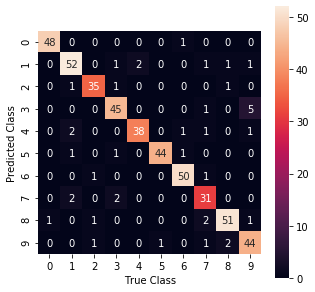

In [1473]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (5,5)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

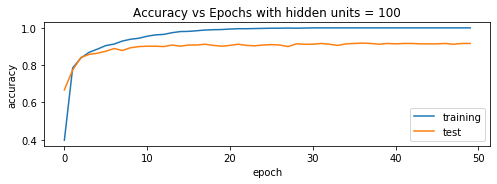

In [1474]:
plot_accgraph(evaluation,100)

<h1> Effect of Hidden Units on Convergence </h1>

In [1475]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

<h2> 20 hidden units </h2>

In [1476]:
# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model20conv = keras.Sequential([
    keras.layers.Dense(20, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model20conv.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Stop iterating when model converges 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train model using 20 hidden units and stop at convergence

evaluation = model20conv.fit(X_train, y_train, validation_split=0.3, epochs=500, callbacks=[es])

Train on 780 samples, validate on 335 samples
Epoch 1/500
780/780 [==============================] - 1s 830us/sample - loss: 2.2905 - accuracy: 0.0859 - val_loss: 2.2576 - val_accuracy: 0.0985
Epoch 2/500
780/780 [==============================] - 0s 161us/sample - loss: 2.2403 - accuracy: 0.0859 - val_loss: 2.2091 - val_accuracy: 0.0985
Epoch 3/500
780/780 [==============================] - 0s 172us/sample - loss: 2.1890 - accuracy: 0.1038 - val_loss: 2.1555 - val_accuracy: 0.1582
Epoch 4/500
780/780 [==============================] - 0s 167us/sample - loss: 2.1370 - accuracy: 0.2090 - val_loss: 2.1040 - val_accuracy: 0.2955
Epoch 5/500
780/780 [==============================] - ETA: 0s - loss: 2.0945 - accuracy: 0.33 - 0s 166us/sample - loss: 2.0844 - accuracy: 0.3603 - val_loss: 2.0520 - val_accuracy: 0.4418
Epoch 6/500
780/780 [==============================] - 0s 163us/sample - loss: 2.0277 - accuracy: 0.4962 - val_loss: 1.9929 - val_accuracy: 0.4896
Epoch 7/500
780/780 [=========

Epoch 55/500
780/780 [==============================] - 0s 164us/sample - loss: 0.2194 - accuracy: 0.9897 - val_loss: 0.3609 - val_accuracy: 0.9194
Epoch 56/500
780/780 [==============================] - 0s 161us/sample - loss: 0.2093 - accuracy: 0.9872 - val_loss: 0.3516 - val_accuracy: 0.9254
Epoch 57/500
780/780 [==============================] - 0s 165us/sample - loss: 0.2001 - accuracy: 0.9910 - val_loss: 0.3491 - val_accuracy: 0.9224
Epoch 58/500
780/780 [==============================] - 0s 164us/sample - loss: 0.1912 - accuracy: 0.9923 - val_loss: 0.3430 - val_accuracy: 0.9224
Epoch 59/500
780/780 [==============================] - 0s 162us/sample - loss: 0.1831 - accuracy: 0.9923 - val_loss: 0.3374 - val_accuracy: 0.9224
Epoch 60/500
780/780 [==============================] - 0s 163us/sample - loss: 0.1751 - accuracy: 0.9936 - val_loss: 0.3282 - val_accuracy: 0.9194
Epoch 61/500
780/780 [==============================] - 0s 165us/sample - loss: 0.1674 - accuracy: 0.9923 - val_

<h2> 50 hidden units </h2>

In [1477]:
# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model50conv = keras.Sequential([
    keras.layers.Dense(50, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model50conv.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Stop iterating when model converges 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train model using 50 hidden units and stop at convergence

evaluation = model50conv.fit(X_train, y_train, validation_split=0.3, epochs=500, callbacks=[es])

Train on 780 samples, validate on 335 samples
Epoch 1/500
780/780 [==============================] - ETA: 0s - loss: 2.2892 - accuracy: 0.07 - 1s 709us/sample - loss: 2.2622 - accuracy: 0.0897 - val_loss: 2.1748 - val_accuracy: 0.1254
Epoch 2/500
780/780 [==============================] - 0s 162us/sample - loss: 2.1229 - accuracy: 0.1295 - val_loss: 2.0225 - val_accuracy: 0.4149
Epoch 3/500
780/780 [==============================] - 0s 162us/sample - loss: 1.9541 - accuracy: 0.5949 - val_loss: 1.8459 - val_accuracy: 0.7284
Epoch 4/500
780/780 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.72 - 0s 169us/sample - loss: 1.7769 - accuracy: 0.7449 - val_loss: 1.6761 - val_accuracy: 0.8090
Epoch 5/500
780/780 [==============================] - 0s 168us/sample - loss: 1.6116 - accuracy: 0.8051 - val_loss: 1.5166 - val_accuracy: 0.8507
Epoch 6/500
780/780 [==============================] - 0s 170us/sample - loss: 1.4531 - accuracy: 0.8385 - val_loss: 1.3733 - val_accur

Epoch 55/500
780/780 [==============================] - 0s 175us/sample - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.1999 - val_accuracy: 0.9313
Epoch 56/500
780/780 [==============================] - 0s 166us/sample - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.1955 - val_accuracy: 0.9373
Epoch 57/500
780/780 [==============================] - 0s 168us/sample - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.1969 - val_accuracy: 0.9373
Epoch 58/500
780/780 [==============================] - 0s 175us/sample - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.1927 - val_accuracy: 0.9373
Epoch 59/500
780/780 [==============================] - 0s 165us/sample - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.1973 - val_accuracy: 0.9373
Epoch 60/500
780/780 [==============================] - 0s 164us/sample - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.1904 - val_accuracy: 0.9373
Epoch 61/500
780/780 [==============================] - 0s 175us/sample - loss: 0.0115 - accuracy: 1.0000 - val_

<h2> 100 hidden units </h2>

In [1478]:
# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

model100conv = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
model100conv.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Stop iterating when model converges 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train model using 100 hidden units and stop at convergence

evaluation = model100conv.fit(X_train, y_train, validation_split=0.3, epochs=500, callbacks=[es])

Train on 780 samples, validate on 335 samples
Epoch 1/500
780/780 [==============================] - 1s 713us/sample - loss: 2.2385 - accuracy: 0.1577 - val_loss: 2.1152 - val_accuracy: 0.1851
Epoch 2/500
780/780 [==============================] - 0s 168us/sample - loss: 1.9591 - accuracy: 0.4756 - val_loss: 1.7465 - val_accuracy: 0.7910
Epoch 3/500
780/780 [==============================] - 0s 173us/sample - loss: 1.6166 - accuracy: 0.7872 - val_loss: 1.4385 - val_accuracy: 0.8537
Epoch 4/500
780/780 [==============================] - 0s 178us/sample - loss: 1.3482 - accuracy: 0.8269 - val_loss: 1.2216 - val_accuracy: 0.8239
Epoch 5/500
780/780 [==============================] - 0s 167us/sample - loss: 1.1321 - accuracy: 0.8462 - val_loss: 1.0265 - val_accuracy: 0.8687
Epoch 6/500
780/780 [==============================] - 0s 174us/sample - loss: 0.9584 - accuracy: 0.8667 - val_loss: 0.8858 - val_accuracy: 0.8746
Epoch 7/500
780/780 [==============================] - 0s 165us/sample -

<h3> Discuss your results. How does number of hidden units affect the final accuracy on the test data? </h3>
    
<p1>In general, as the number of hidden units increases, the final accuracy on the test data increases slightly, to a point. We should very likely see an increase in final accuracy going from 20 hidden units to 100 hidden units. However, it is possible given how the data gets split, that 50 hidden units may have slightly higher accuracy than 100 hidden units, or 20 hidden units may have slightly higher accuracy than 50 hidden units. Also, we cannot continually increase test accuracy by simply increasing the number of hidden units, as accuracy eventually plateaus or decreases. The ideal number of hidden units (taking into account efficient use of computing power as well) should be somewhere between the size of the input and output layers and requires testing. A rule of thumb is 2/3 of the input layer plus the output layer. </p1>

<h3> Discuss your results. How does number of hidden units affect number of epochs needed for training to converge?</h3>

<p1> In general, as the number of hidden units increases, less epochs are needed for training to converge. This was observed in the above convergence tests. </p1>

<h3> Is there any evidence that any of your networks overfit to the training data? If so, what is the evidence? </h3>

<p1> Yes - all networks are overfit. This can be seen from the accuracy vs epochs plots -- our final training accuracy is higher than final test accuracy. </p1>

<h1> Training using a quarter of the data <h1>

In [1479]:
# 1,593 total images and corresponding label in our data set
len(y)

1593

In [1480]:
# We can see that the spread of the data over all 1,593 observations is already quite balanced among the 10 classes
# of digits. 
sum(y)/len(y)

array([0.10106717, 0.10169492, 0.09981168, 0.09981168, 0.10106717,
       0.09981168, 0.10106717, 0.09918393, 0.09730069, 0.09918393])

In [1481]:
# Split into training and test sets, but with training data consisting of 25% and stratified wrt class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.25, random_state = 10)

In [1482]:
# How many samples in our training set? 1,593 x .25
len(y_train)

398

In [1483]:
# We confirm roughly equal splits among the 10 classes in training set
sum(y_train)/len(y_train)

array([0.10050251, 0.10050251, 0.10050251, 0.10050251, 0.10050251,
       0.10050251, 0.10050251, 0.10050251, 0.09798995, 0.09798995])

In [1484]:
# Clear previous session
keras.backend.clear_session()

In [1485]:
# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

modelqtr = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
modelqtr.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Output summary
modelqtr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


In [1486]:
# Train the neural net

evaluation = modelqtr.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 398 samples, validate on 1195 samples
Epoch 1/50
398/398 [==============================] - ETA: 4s - loss: 2.3206 - accuracy: 0.09 - 1s 1ms/sample - loss: 2.2354 - accuracy: 0.2889 - val_loss: 2.1332 - val_accuracy: 0.3707
Epoch 2/50
398/398 [==============================] - 0s 362us/sample - loss: 2.0303 - accuracy: 0.5452 - val_loss: 1.9519 - val_accuracy: 0.5992
Epoch 3/50
398/398 [==============================] - 0s 394us/sample - loss: 1.8195 - accuracy: 0.7462 - val_loss: 1.7637 - val_accuracy: 0.7063
Epoch 4/50
398/398 [==============================] - 0s 395us/sample - loss: 1.6238 - accuracy: 0.8040 - val_loss: 1.6028 - val_accuracy: 0.7665
Epoch 5/50
398/398 [==============================] - 0s 395us/sample - loss: 1.4524 - accuracy: 0.8593 - val_loss: 1.4632 - val_accuracy: 0.7732
Epoch 6/50
398/398 [==============================] - 0s 393us/sample - loss: 1.3015 - accuracy: 0.8668 - val_loss: 1.3427 - val_accuracy: 0.8092
Epoch 7/50
398/398 [=================

In [1487]:
test_loss, test_acc = modelqtr.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 1.0

Test accuracy: 0.89037657


In [1488]:
# Store predictions on test set images
predictions = set_target(modelqtr.predict(X_test))

# Verify shape and output of predictions
print(predictions.shape)
predictions

(1195, 10)


array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [1489]:
# Convert predictions to actual digit value

predicted = np.argmax(predictions, axis = 1)
print(predicted.shape)
predicted

(1195,)


array([5, 5, 3, ..., 8, 8, 6], dtype=int64)

In [1490]:
# Convert labels to actual digit value
actual = np.argmax(y_test, axis = 1)
print(actual.shape)
actual

(1195,)


array([5, 5, 3, ..., 8, 8, 6], dtype=int64)

In [1491]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.8904
Precision:
[0.98305085 0.80434783 0.87603306 0.94642857 0.85483871 0.95535714
 0.94871795 0.86290323 0.86666667 0.83064516]
Recall:
[0.95867769 0.90983607 0.8907563  0.8907563  0.87603306 0.89915966
 0.91735537 0.90677966 0.78448276 0.86554622]


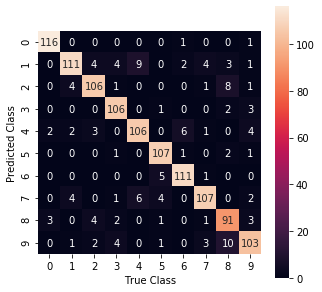

In [1492]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (5,5)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

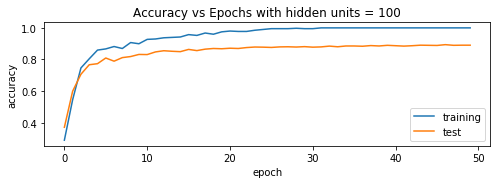

In [1493]:
plot_accgraph(evaluation,100)

<h1> Training using half of the data <h1>

In [1494]:
# Split into training and test sets, but with training data consisting of 50% and stratified wrt class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.50, random_state = 10)

In [1495]:
# How many samples in our training set? 1,593 x .50
len(y_train)

796

In [1496]:
# We confirm roughly equal splits among the 10 classes in training set
sum(y_train)/len(y_train)

array([0.10050251, 0.10175879, 0.10050251, 0.09924623, 0.10050251,
       0.10050251, 0.10050251, 0.09924623, 0.09798995, 0.09924623])

In [1497]:
# Clear previous session
keras.backend.clear_session()

In [1498]:
# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

modelhalf = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
modelhalf.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Output summary
modelhalf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 26,710
Trainable params: 26,710
Non-trainable params: 0
_________________________________________________________________


In [1499]:
# Train the neural net

evaluation = modelhalf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 796 samples, validate on 797 samples
Epoch 1/50
796/796 [==============================] - 1s 1ms/sample - loss: 2.2347 - accuracy: 0.1633 - val_loss: 2.0481 - val_accuracy: 0.4956
Epoch 2/50
796/796 [==============================] - 0s 217us/sample - loss: 1.8797 - accuracy: 0.6872 - val_loss: 1.7301 - val_accuracy: 0.6989
Epoch 3/50
796/796 [==============================] - 0s 209us/sample - loss: 1.5727 - accuracy: 0.7889 - val_loss: 1.4651 - val_accuracy: 0.7804
Epoch 4/50
796/796 [==============================] - 0s 207us/sample - loss: 1.3203 - accuracy: 0.8405 - val_loss: 1.2529 - val_accuracy: 0.8093
Epoch 5/50
796/796 [==============================] - 0s 211us/sample - loss: 1.1121 - accuracy: 0.8656 - val_loss: 1.0790 - val_accuracy: 0.8344
Epoch 6/50
796/796 [==============================] - 0s 210us/sample - loss: 0.9395 - accuracy: 0.8819 - val_loss: 0.9393 - val_accuracy: 0.8356
Epoch 7/50
796/796 [==============================] - 0s 213us/sample - loss: 0.

In [1500]:
test_loss, test_acc = modelhalf.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 1.0

Test accuracy: 0.9209536


In [1501]:
# Store predictions on test set images
predictions = set_target(modelhalf.predict(X_test))

# Verify shape and output of predictions
print(predictions.shape)
predictions

(797, 10)


array([[0.9, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.9, ..., 0.1, 0.1, 0.1],
       [0.9, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.9],
       [0.1, 0.1, 0.1, ..., 0.9, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.9, 0.1]])

In [1502]:
# Convert predictions to actual digit value

predicted = np.argmax(predictions, axis = 1)
print(predicted.shape)
predicted

(797,)


array([0, 2, 0, 5, 9, 0, 9, 3, 0, 9, 7, 6, 2, 0, 5, 6, 7, 1, 4, 0, 0, 2,
       5, 2, 0, 7, 2, 2, 6, 6, 2, 6, 2, 5, 0, 6, 2, 0, 9, 1, 0, 0, 2, 3,
       5, 0, 8, 8, 0, 1, 2, 7, 7, 4, 8, 4, 5, 1, 8, 5, 0, 8, 3, 9, 6, 9,
       6, 4, 5, 4, 7, 3, 4, 0, 0, 8, 8, 9, 3, 6, 6, 4, 4, 3, 9, 5, 1, 4,
       5, 9, 9, 1, 4, 4, 8, 6, 2, 7, 3, 0, 0, 7, 5, 2, 0, 8, 4, 4, 9, 1,
       6, 8, 1, 6, 8, 7, 9, 8, 0, 3, 3, 5, 0, 9, 3, 4, 2, 6, 2, 7, 0, 6,
       0, 9, 9, 5, 6, 7, 2, 6, 5, 6, 2, 9, 4, 0, 9, 1, 1, 1, 5, 0, 4, 3,
       1, 3, 7, 4, 1, 9, 4, 9, 3, 6, 2, 6, 5, 6, 5, 8, 5, 4, 3, 4, 5, 1,
       5, 0, 7, 4, 9, 8, 5, 4, 9, 5, 2, 1, 6, 4, 4, 1, 5, 7, 6, 4, 2, 6,
       5, 9, 1, 0, 8, 1, 3, 2, 9, 7, 4, 4, 2, 3, 2, 5, 4, 7, 7, 0, 3, 8,
       2, 0, 0, 7, 1, 1, 6, 5, 0, 3, 0, 0, 9, 0, 2, 8, 2, 3, 2, 8, 4, 1,
       8, 0, 1, 9, 1, 8, 6, 3, 4, 6, 6, 4, 1, 7, 2, 7, 9, 6, 1, 2, 3, 3,
       9, 3, 4, 3, 1, 1, 5, 3, 9, 2, 5, 6, 6, 7, 0, 2, 7, 3, 6, 2, 1, 8,
       1, 1, 3, 4, 8, 5, 7, 9, 0, 7, 4, 1, 2, 4, 8,

In [1503]:
# Convert labels to actual digit value
actual = np.argmax(y_test, axis = 1)
print(actual.shape)
actual

(797,)


array([0, 4, 0, 5, 8, 0, 9, 3, 0, 9, 7, 6, 2, 0, 5, 6, 7, 9, 4, 0, 0, 2,
       5, 2, 0, 7, 2, 2, 6, 6, 2, 6, 2, 5, 0, 6, 2, 0, 9, 1, 0, 0, 2, 3,
       5, 0, 8, 8, 0, 1, 2, 7, 7, 4, 8, 4, 5, 7, 8, 5, 0, 7, 3, 9, 6, 9,
       6, 4, 5, 4, 7, 3, 4, 0, 0, 8, 8, 9, 3, 6, 6, 4, 4, 3, 9, 5, 1, 4,
       5, 9, 9, 1, 4, 4, 8, 6, 2, 7, 3, 0, 0, 7, 5, 2, 8, 8, 4, 4, 9, 1,
       6, 8, 1, 6, 8, 7, 9, 8, 0, 3, 3, 5, 0, 9, 3, 4, 2, 6, 2, 7, 0, 6,
       0, 9, 9, 5, 6, 7, 2, 6, 5, 5, 2, 9, 4, 0, 9, 1, 1, 1, 5, 0, 4, 3,
       1, 3, 7, 4, 4, 9, 4, 9, 3, 6, 2, 6, 5, 6, 5, 8, 5, 6, 3, 4, 5, 5,
       5, 0, 7, 4, 9, 8, 5, 4, 9, 5, 2, 1, 6, 4, 4, 1, 5, 7, 6, 4, 1, 6,
       0, 9, 2, 0, 8, 1, 3, 2, 9, 7, 4, 4, 2, 3, 2, 5, 4, 7, 7, 0, 3, 8,
       2, 0, 0, 7, 1, 1, 6, 5, 0, 3, 0, 0, 9, 0, 2, 8, 2, 3, 8, 8, 4, 1,
       9, 0, 7, 9, 1, 8, 6, 3, 2, 6, 6, 4, 1, 7, 2, 7, 7, 6, 1, 2, 3, 3,
       9, 3, 4, 3, 1, 1, 5, 3, 9, 2, 5, 6, 6, 9, 0, 2, 7, 3, 6, 2, 1, 8,
       1, 1, 3, 4, 8, 5, 7, 8, 0, 7, 4, 3, 2, 1, 8,

In [1504]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.921
Precision:
[0.97530864 0.86363636 0.90243902 0.96153846 0.91025641 0.94936709
 0.9625     0.92207792 0.91304348 0.85882353]
Recall:
[0.97530864 0.9382716  0.93670886 0.9375     0.87654321 0.94936709
 0.95061728 0.89873418 0.81818182 0.92405063]


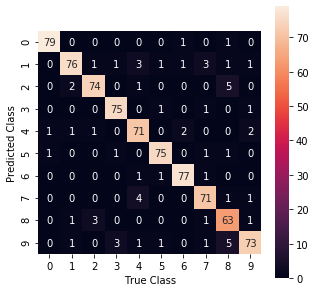

In [1505]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (5,5)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

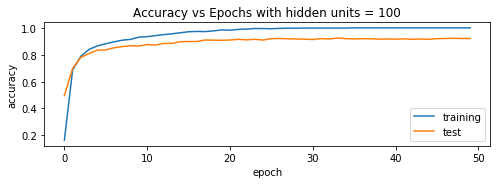

In [1506]:
plot_accgraph(evaluation,100)

<h1> Effect of Training Data size on Convergence </h1>

<h2> 25% training data (100 hidden units) </h2>

In [1507]:
# Split into training and test sets, but with training data consisting of 25% and stratified wrt class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.25, random_state = 10)

# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

modelqtrconv = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
modelqtrconv.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Stop iterating when model converges 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train model using 25% training data (100 hidden units) and stop at convergence

evaluation = modelqtrconv.fit(X_train, y_train, validation_split=0.3, epochs=500, callbacks=[es])

Train on 278 samples, validate on 120 samples
Epoch 1/500
278/278 [==============================] - 0s 2ms/sample - loss: 2.2783 - accuracy: 0.1295 - val_loss: 2.2246 - val_accuracy: 0.2500
Epoch 2/500
278/278 [==============================] - 0s 175us/sample - loss: 2.1741 - accuracy: 0.3417 - val_loss: 2.1351 - val_accuracy: 0.4667
Epoch 3/500
278/278 [==============================] - 0s 173us/sample - loss: 2.0566 - accuracy: 0.5863 - val_loss: 2.0250 - val_accuracy: 0.5333
Epoch 4/500
278/278 [==============================] - 0s 178us/sample - loss: 1.9202 - accuracy: 0.7194 - val_loss: 1.8921 - val_accuracy: 0.6500
Epoch 5/500
278/278 [==============================] - 0s 177us/sample - loss: 1.7806 - accuracy: 0.7806 - val_loss: 1.7627 - val_accuracy: 0.7667
Epoch 6/500
278/278 [==============================] - 0s 187us/sample - loss: 1.6450 - accuracy: 0.8741 - val_loss: 1.6576 - val_accuracy: 0.7750
Epoch 7/500
278/278 [==============================] - 0s 193us/sample - l

<h2> 50% training data (100 hidden units) </h2>

In [1508]:
# Split into training and test sets, but with training data consisting of 50% and stratified wrt class
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = 0.50, random_state = 10)

# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

modelhalfconv = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (X_train.shape[1],), use_bias=True, bias_initializer='ones'),
    keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer='ones'),
])

from tensorflow.python.keras import optimizers

# Specify learning rate of 0.1

sgd = optimizers.SGD(lr=0.1, momentum=0.0, nesterov=False)

# Compile step required before training, set loss function with accuracy metrics
modelhalfconv.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Stop iterating when model converges 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Train model using 50% training data (100 hidden units) and stop at convergence

evaluation = modelhalfconv.fit(X_train, y_train, validation_split=0.3, epochs=500, callbacks=[es])

Train on 557 samples, validate on 239 samples
Epoch 1/500
557/557 [==============================] - 1s 1ms/sample - loss: 2.2463 - accuracy: 0.1275 - val_loss: 2.1679 - val_accuracy: 0.1925
Epoch 2/500
557/557 [==============================] - 0s 176us/sample - loss: 2.0519 - accuracy: 0.4650 - val_loss: 1.9448 - val_accuracy: 0.6569
Epoch 3/500
557/557 [==============================] - 0s 172us/sample - loss: 1.8034 - accuracy: 0.7522 - val_loss: 1.7128 - val_accuracy: 0.7866
Epoch 4/500
557/557 [==============================] - 0s 174us/sample - loss: 1.5705 - accuracy: 0.8510 - val_loss: 1.5244 - val_accuracy: 0.7531
Epoch 5/500
557/557 [==============================] - 0s 176us/sample - loss: 1.3694 - accuracy: 0.8402 - val_loss: 1.3432 - val_accuracy: 0.7992
Epoch 6/500
557/557 [==============================] - 0s 173us/sample - loss: 1.1984 - accuracy: 0.8600 - val_loss: 1.2154 - val_accuracy: 0.7741
Epoch 7/500
557/557 [==============================] - 0s 177us/sample - l

<h3> Discuss your results. How does size of training data affect the final accuracy on the test data? </h3>
    
<p1>The more training data we have, the better the model and thus the higher the final accuracy on the test data (unseen data). This means that our neural network generalizes to unseen data better the more training data it has to work with (also taking care to limit overfitting). Here, we got an increase of roughly 3%. </p1>

<h3> Discuss your results. How does size of training data affect number of epochs needed for training to converge? </h3>
<p1> In general, the more data we have for training, the less epochs are needed for training to converge. This was observed in the above convergence tests.</p1> 

<h3> Is there any evidence that any of your networks overfit to the training data? If so, what is the evidence? </h3>

<p1> Yes - all networks are overfit. This can be seen from the accuracy vs epochs plots -- our final training accuracy is higher than final test accuracy. </p1>

<h1> Extra Credit - increasing accuracy of best model </h1>

In [1509]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [1510]:
# Clear previous session
keras.backend.clear_session()

# Initiate neural net
# Hidden layer contains x number of neurons and both hidden and output layer 
# utilize sigmoid activation function with bias unit of 1

modeltuned = keras.Sequential([
    keras.layers.Dense(181, activation='sigmoid', input_shape = (X_train.shape[1],)),
    keras.layers.Dense(10, activation='sigmoid')
])

from tensorflow.python.keras import optimizers

# Use Adam optimizer with learning rate of 0.01

adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

# Compile step required before training, set loss function with accuracy metrics
modeltuned.compile(loss='binary_crossentropy', metrics=['accuracy'])

#Output summary
modeltuned.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 181)               46517     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1820      
Total params: 48,337
Trainable params: 48,337
Non-trainable params: 0
_________________________________________________________________


In [1511]:
evaluation = modeltuned.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Train on 1274 samples, validate on 319 samples
Epoch 1/50
1274/1274 [==============================] - 1s 459us/sample - loss: 0.3213 - accuracy: 0.8841 - val_loss: 0.2531 - val_accuracy: 0.9000
Epoch 2/50
1274/1274 [==============================] - 0s 123us/sample - loss: 0.2137 - accuracy: 0.9092 - val_loss: 0.1928 - val_accuracy: 0.9163
Epoch 3/50
1274/1274 [==============================] - 0s 122us/sample - loss: 0.1616 - accuracy: 0.9372 - val_loss: 0.1561 - val_accuracy: 0.9420
Epoch 4/50
1274/1274 [==============================] - 0s 135us/sample - loss: 0.1295 - accuracy: 0.9569 - val_loss: 0.1324 - val_accuracy: 0.9558
Epoch 5/50
1274/1274 [==============================] - 0s 138us/sample - loss: 0.1069 - accuracy: 0.9668 - val_loss: 0.1162 - val_accuracy: 0.9633
Epoch 6/50
1274/1274 [==============================] - 0s 137us/sample - loss: 0.0902 - accuracy: 0.9743 - val_loss: 0.1025 - val_accuracy: 0.9680
Epoch 7/50
1274/1274 [==============================] - 0s 137us/

In [1512]:
test_loss, test_acc = modeltuned.evaluate(X_test,  y_test, verbose=0)
print('Training accuracy:',max(evaluation.history['accuracy']))
print('\nTest accuracy:', test_acc)

Training accuracy: 1.0

Test accuracy: 0.9846394


<h3> Document what changes you needed to make to achieve these results. </h3>
<p> I used rule of thumb of 2/3 input layer + output layer to compute number of hidden units and reverted back to default bias units. I used 'Adam' optimizer rather than SGD, with default settings found here:

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

However, rather than learning rate of .01, I set it to 0.1 instead. My compile step uses binary cross-entropy loss function instead of categorical.  

Final Accuracy achieved is 98.5%, compared with previous highest accuracy on test set of around 92%.
</p>